In [31]:
import torch
from ultralytics import YOLO
from ultralytics import YOLO
from slink_tools.object_detection_tools import save_label, draw_boxes

In [3]:
model_path = "models/yolov3u.pt"
test_image_path = "./assets/dog_bike_car.jpg"

In [41]:
yolov3 = YOLO('models/yolov3u.pt')  # 加载预训练的YOLOv3模型
results = yolov3.predict(test_image_path, conf=0.1)


image 1/1 /Users/alvis/Library/CloudStorage/OneDrive-Office365/PaperReading/computer_vision/object_detection/2016_yolo/labs/assets/dog_bike_car.jpg: 480x640 1 bicycle, 1 car, 1 motorcycle, 1 truck, 1 dog, 334.2ms
Speed: 1.6ms preprocess, 334.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


In [42]:
for result in results:
    # 类别: xyxy conf
    for box in result.boxes:
        print(f"类别: {result.names[int(box.cls)]:8}, 边框: {box.xyxy.view(-1)}, conf: {box.conf[0]:.4f}")


类别: bicycle , 边框: tensor([125.2918, 130.6662, 566.8625, 421.9901]), conf: 0.9580
类别: dog     , 边框: tensor([131.8895, 220.3063, 310.4198, 540.5966]), conf: 0.9419
类别: car     , 边框: tensor([465.2870,  74.4880, 688.2521, 170.6952]), conf: 0.5187
类别: truck   , 边框: tensor([465.1011,  75.1496, 688.5916, 169.9221]), conf: 0.5164
类别: motorcycle, 边框: tensor([ 55.6617,  71.9032, 111.4688, 131.5881]), conf: 0.2842


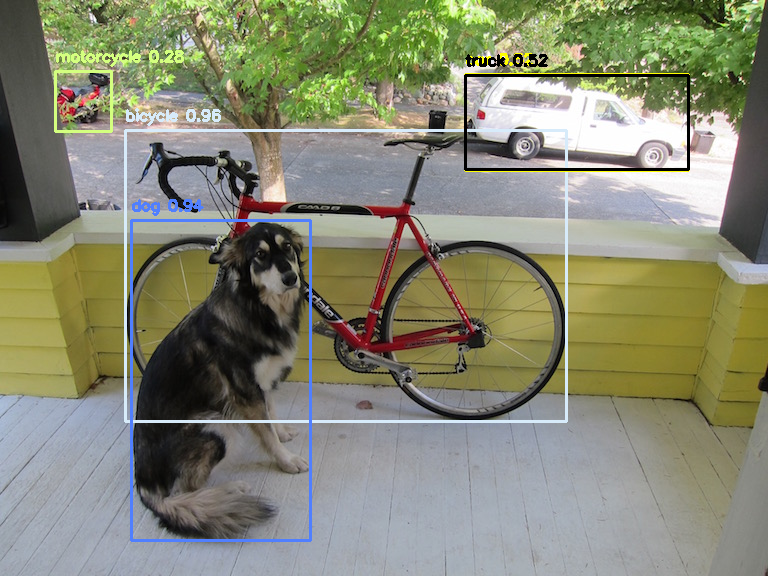

In [43]:
image_detected = draw_boxes(results=results, img=test_image_path, class_names=yolov3.names)
display(image_detected)

In [44]:
yolov3 = YOLO('models/yolov3u.pt')  # 加载预训练的YOLOv3模型
save_label(yolov3, "./assets/dog_bike_car.jpg", save_label_dir="./assets/labels/", suffix="_yolov3")

已保存标签：./assets/labels/dog_bike_car_yolov3.txt
